In [8]:
import networkx as nx
import numpy as np 
import matplotlib.pyplot as plt
import random

In [15]:
def graph_summary(graph,graph_name):
    # print(graph)
    # print("Promien grafu: {}".format(nx.radius(graph) if nx.is_connected(graph) else np.inf))
    # print("Srednica grafu: {}".format(nx.diameter(graph) if nx.is_connected(graph) else np.inf))
    # print("Maksymaly stopien grafu: {}".format(np.max(nx.degree(graph))))
    # print("Sredni stopien grafu: {}".format(np.mean(nx.degree(graph))))
    histo_data = []
    for degree in nx.degree(graph):
        histo_data.append(degree[1])
    plt.title(graph_name)
    plt.hist(histo_data,bins=50)
    plt.show()

In [10]:
def draw_graph(graph):
    nx.draw_spring(graph)
    plt.show()
    passbarabasi

In [11]:
def create_barabasi_albert(initial_nodes,new_nodes,limit_edge):
    graph = nx.complete_graph(initial_nodes)
    for i in range(new_nodes):
        new_node = initial_nodes + i
        graph.add_node(new_node)
        degrees = [degree for node,degree in graph.degree()]
        targets = random.choices(list(graph.nodes),weights=degrees,k=limit_edge)
        for t in targets:
            graph.add_edge(new_node,t)
    return graph

In [12]:
def create_erdos_renyi(vertices, chance):
    graph = nx.Graph()
    graph.add_nodes_from(range(vertices))
    for node1 in graph:
        for node2 in graph:
            if node1 == node2:
                continue
            if chance > np.random.random():
                graph.add_edge(node1,node2)
            
    return graph

In [19]:

def create_watts_strogats(node_count,near_neighbours_count,probality):
    graph = nx.Graph()
    graph.add_nodes_from(range(node_count))
    for node in range(len(graph)):
        for offset in range(-near_neighbours_count,near_neighbours_count+1):
            if offset == 0:
                continue
            graph.add_edge(node,(node+offset)%node_count)
    for node_index in range(len(graph)):
        for offset in range(-near_neighbours_count,near_neighbours_count+1):
            if offset == 0:
                continue
            if probality > np.random.random() and graph.has_edge(node_index,(node_index)%node_count):
                graph.remove_edge(node_index,(node_index+offset)%node_count)
                new_connection = random.choice(range(len(graph)))
                graph.add_edge(node_index,new_connection)
    return graph

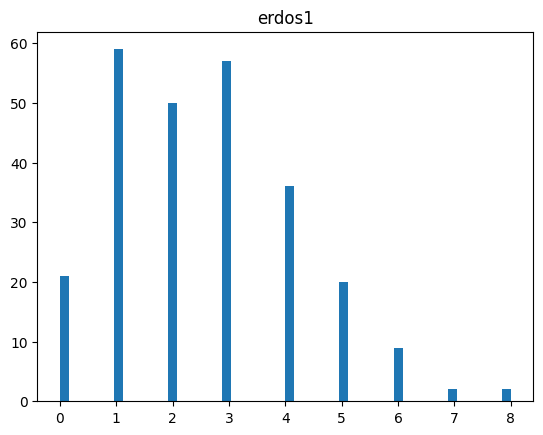

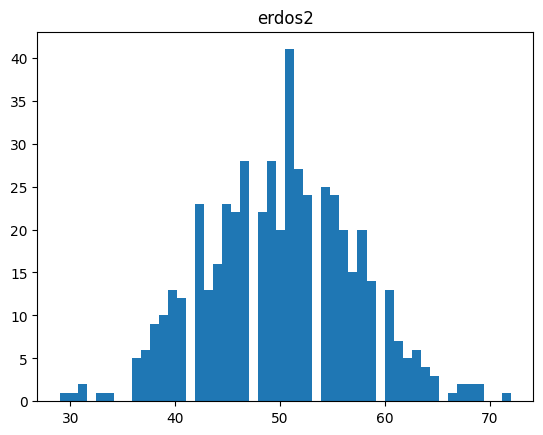

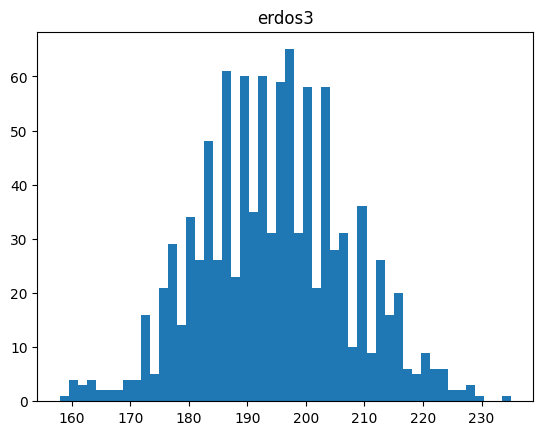

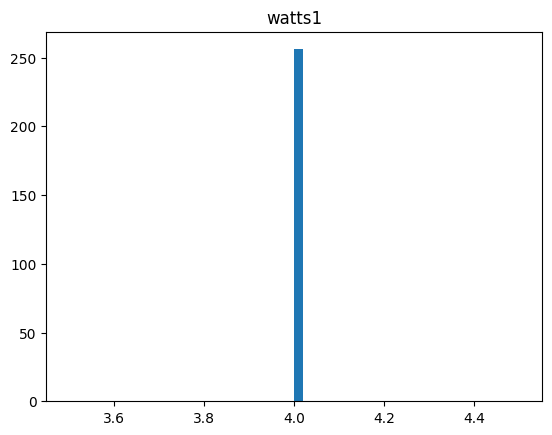

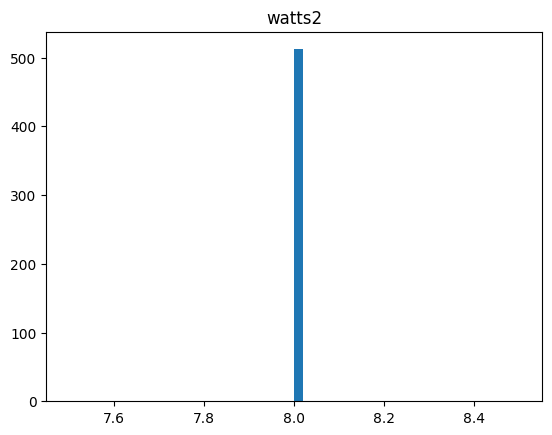

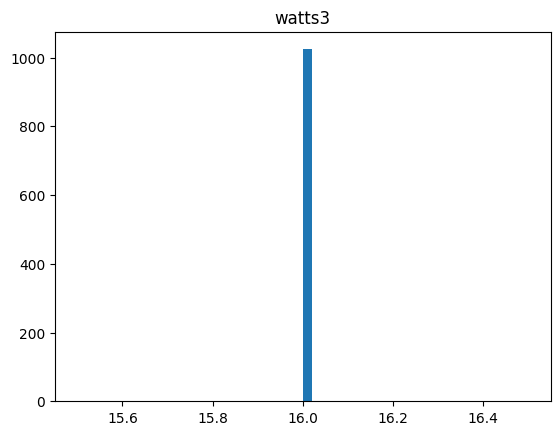

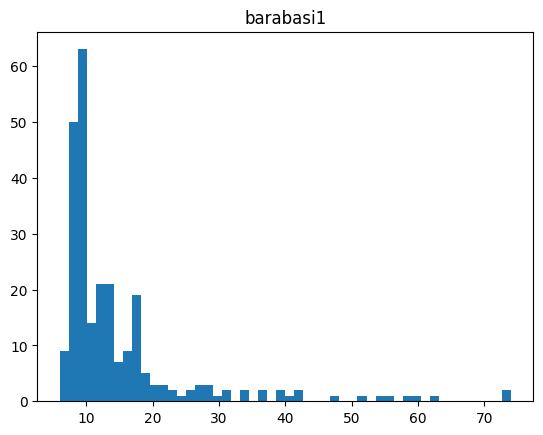

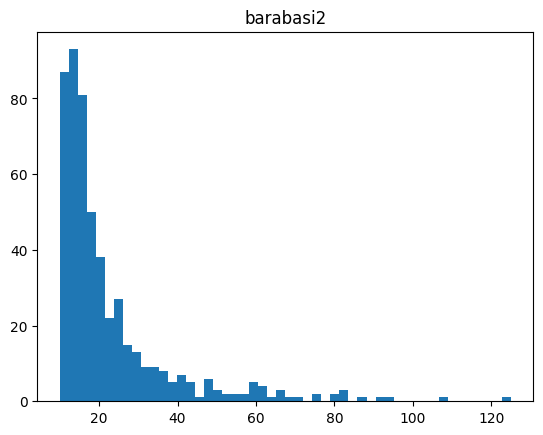

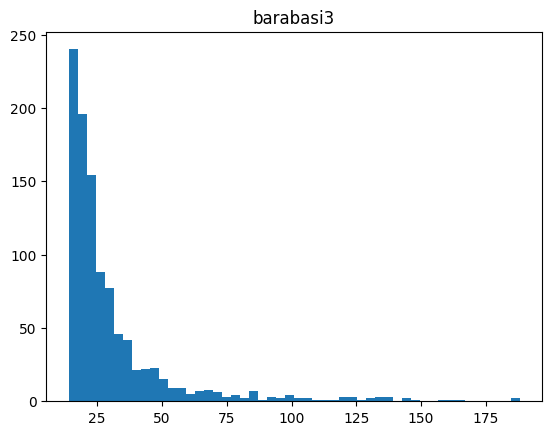

In [20]:
all_graphs = {
    
    "erdos1" : create_erdos_renyi(256,0.005), 
    "erdos2" : create_erdos_renyi(512,0.05),
    "erdos3" : create_erdos_renyi(1024,0.1),
    "watts1" : create_watts_strogats(256,2,0.05),
    "watts2" : create_watts_strogats(512,4,0.1),
    "watts3" : create_watts_strogats(1024,8,0.15),
    "barabasi1" : create_barabasi_albert(4,256-4,8),
    "barabasi2" : create_barabasi_albert(4,512-4,12),
    "barabasi3" : create_barabasi_albert(8,1024-8,16),

}
for graph_name in all_graphs:
    graph_summary(all_graphs[graph_name],graph_name)
